In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-2/train.csv
/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv
/kaggle/input/covid19-global-forecasting-week-1/train.csv
/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
train=pd.read_csv(r"../input/covid19-global-forecasting-week-2/train.csv")
test=pd.read_csv(r"../input/covid19-global-forecasting-week-2/test.csv")

In [35]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [36]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23


In [37]:
train.shape

(19698, 6)

In [38]:
train.isnull().sum()

Id                    0
Province_State    11323
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [39]:
#Confirmed Cases by Country
df=train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum()\
.groupby(['Country_Region','Province_State',]).max().sort_values()\
.groupby(['Country_Region']).sum().sort_values(ascending =False)
data10=pd.DataFrame(df).head(10)
data10

,ConfirmedCases
Country_Region,
US,121326.0
Italy,92472.0
China,82000.0
Spain,73235.0
Germany,57695.0
France,38105.0
Iran,35408.0
United Kingdom,17304.0
Switzerland,14076.0


In [40]:
import itertools
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [41]:
fig=px.bar(data10,x=data10.index,y='ConfirmedCases',labels={'x':'Country'},
          color="ConfirmedCases",color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Con firmed Cases by Country')
fig.show()

In [42]:
df_by_date=pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())
fig=px.bar(df_by_date.loc[(df_by_date['Country_Region']=='US') & (df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending =False),
          x='Date',y='ConfirmedCases',color="ConfirmedCases",color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed Cases per date in United States')
fig.show()

In [43]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed cases per day in Italy')
fig.show()

In [44]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed cases per day in China')
fig.show()

In [45]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed  cases per day in Spain')
fig.show()

In [46]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed  cases per day in Germany')
fig.show()

In [47]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed  cases per day in India')
fig.show()

In [48]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.head()

,Date,Country_Region,Id,ConfirmedCases,Fatalities
0,2020-01-22,Afghanistan,1,0.0,0.0
1,2020-01-22,Albania,101,0.0,0.0
2,2020-01-22,Algeria,201,0.0,0.0
3,2020-01-22,Andorra,301,0.0,0.0
4,2020-01-22,Angola,401,0.0,0.0


In [53]:
def pltCountry_Cases(ConfirmedCases,*argv):
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv:
        country=df.loc[df(['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Number of Cases')

In [54]:
def pltCountry_Fatalities(Fatalities,*argv):
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv:
        country=df.loc[df(['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Number of fatalities')

TypeError: 'DataFrame' object is not callable

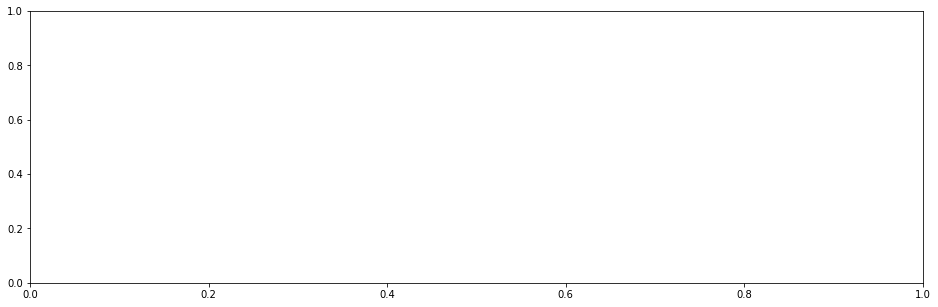

In [55]:
pltCountry_Cases('ConfirmedCases','China')
pltCountry_Fatalities('Fatalities','China')